In [1]:
# Import Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Inspect the Measurement table
engine.execute("SELECT * FROM Measurement LIMIT 5").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [11]:
# Inspect the Measurement columns and type
inspector = inspect(engine)
columns = inspector.get_columns("Measurement")
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Inspect the Station table
engine.execute("SELECT * FROM Station LIMIT 5").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [13]:
# Inspect the Station columns and type
inspector2 = inspect(engine)
columns2 = inspector.get_columns("Station")
for c2 in columns2:
    print(c2["name"], c2["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1af1802eef0>,
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01',
 'prcp': 0.08,
 'station': 'USC00519397'}

In [15]:
first_row2 = session.query(Station).first()
first_row2.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1af1b31bd30>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

# Exploratory Climate Analysis

In [16]:
# Import additional dependencies
import datetime as dt 
from datetime import date

# Calculate the the last data point in the database
maxdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(maxdate)

('2017-08-23',)


In [17]:
# Calculate the date 1 year ago from the last data point in the database
date_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

In [18]:
print(date_year_ago)

2016-08-23


In [19]:
# Design and perform a query to retrieve the data and precipitation scores sorted by date, ascending for the last 12 months
prcpdata = session.query(Measurement.date,Measurement.prcp).\
                    filter(Measurement.date >= date_year_ago).\
                    order_by(Measurement.date).all()

In [20]:
prcpdata

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [21]:
# Save the query results as a Pandas DataFrame
prcp_df = pd.DataFrame(prcpdata, columns = ["Date","Precipitation"])

# Change datatype from element to datetime object on Pandas
prcp_df["Date"] = pd.to_datetime(prcp_df["Date"], format="%Y-%m-%d")

# View first 10 rows of the precipitation dataframe
prcp_df.head(10)

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
5,2016-08-23,1.79
6,2016-08-23,0.70
7,2016-08-24,0.08
8,2016-08-24,2.15
9,2016-08-24,2.28


In [22]:
prcp_df.count()


Date             2230
Precipitation    2021
dtype: int64

In [23]:
newprcp_df = prcp_df.dropna(axis = 0, how ='any')
newprcp_df.head()

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
4,2016-08-23,0.02
5,2016-08-23,1.79


In [24]:
newprcp_df.count()


Date             2021
Precipitation    2021
dtype: int64

In [25]:
newprcp_df1 = newprcp_df.set_index("Date")
newprcp_df1.head(10)

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28


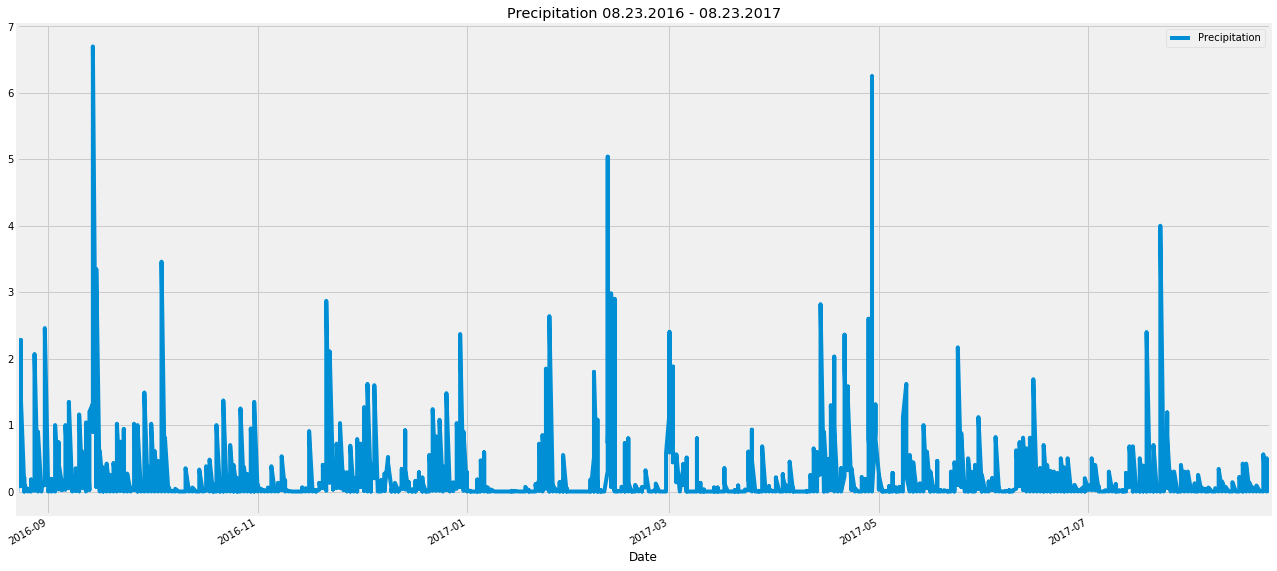

In [59]:
newprcp_df1.plot(title = "Precipitation 08.23.2016 - 08.23.2017",figsize = (20,10))
plt.savefig("Precipitation.png")

In [27]:
#Group the dataframe by date and get the average precipitation for each unique date.
precipmeandf = newprcp_df1.groupby("Date").mean()
precipmeandf

,Precipitation
Date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
2016-08-29,0.243333
2016-08-30,0.011667
2016-08-31,0.636000


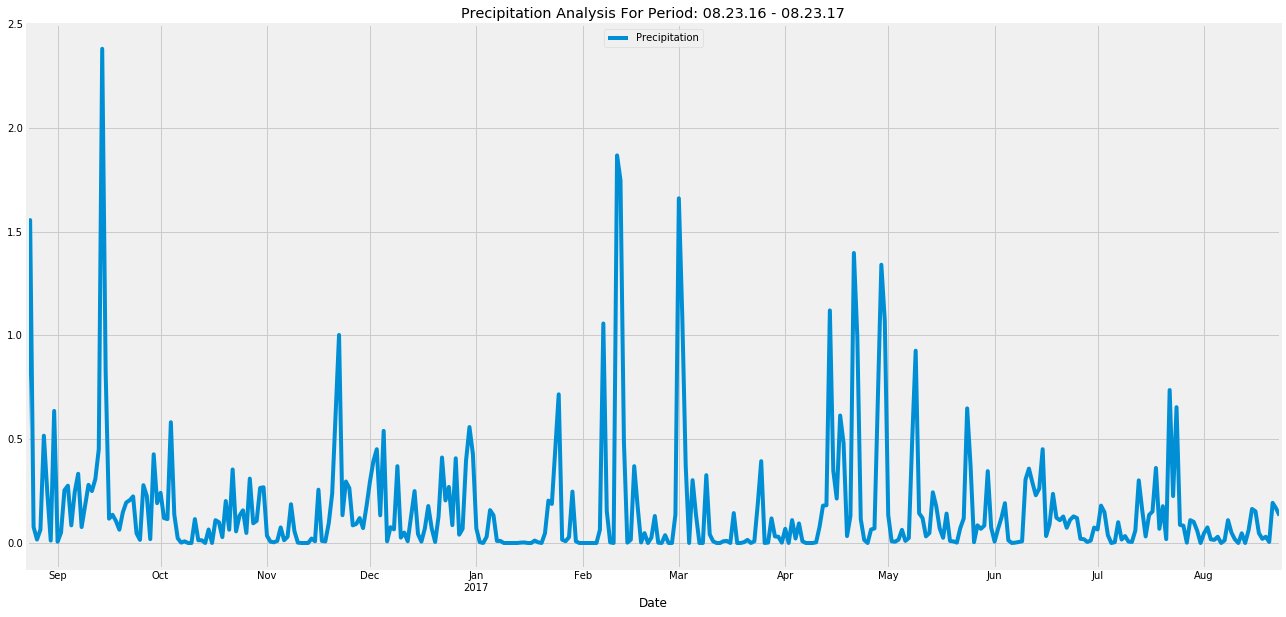

In [60]:
# Use Pandas Plotting with Matplotlib to plot the data
precipmeandf.plot(kind = "line", title ="Precipitation Analysis For Period: 08.23.16 - 08.23.17", figsize = (20,10))
plt.grid(True)
plt.xlabel("Date")
plt.legend(loc = "upper center")
plt.savefig("Precipitation Mean version1.png")



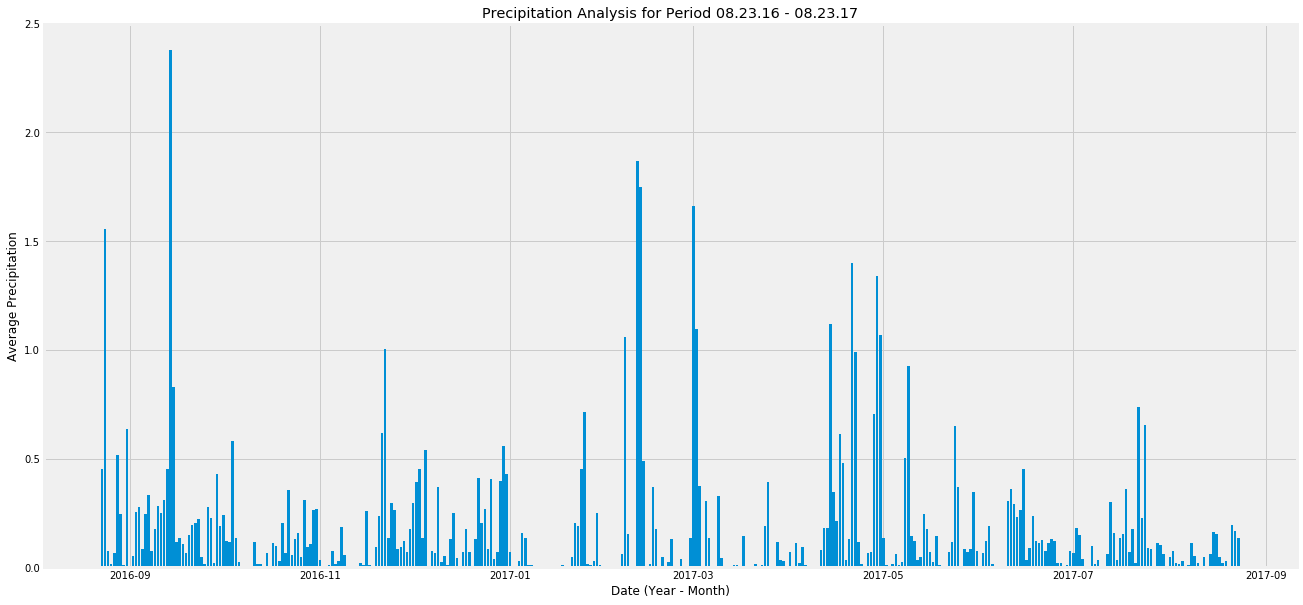

In [61]:
#Plotting the dataframe by bar chart as suggested by TA Kevin.
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(precipmeandf.index, precipmeandf["Precipitation"])

plt.title("Precipitation Analysis for Period 08.23.16 - 08.23.17")
plt.ylabel("Average Precipitation")
plt.xlabel("Date (Year - Month)")

ax.format_xdata = mdates.DateFormatter('%Y-%m')
plt.savefig("Precipitation_Mean_Bar_Graph.png")



In [83]:
# Use Pandas to calculate the summary statistics for the precipitation data
newprcp_df.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [63]:
# Design a query to show how many stations are available in this dataset?
available_stations = session.query(Measurement.station).distinct().count()
available_stations

9

In [64]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [65]:
activedf = pd.DataFrame(active_stations, columns = ["Station","Count"])
activedf

,Station,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [66]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active_station = active_stations[0][0]
most_active_station

'USC00519281'

In [67]:
most_active_stats = session.query(func.max(Measurement.tobs),func.min(Measurement.tobs),func.avg(Measurement.tobs)).filter( Measurement.station == most_active_station)
f"Low: {most_active_stats[0][0]} High: {most_active_stats[0][1]} Average: {round(most_active_stats[0][2],4)}"

'Low: 85.0 High: 54.0 Average: 71.6638'

In [68]:
# Choose the station with the highest number of temperature observations.
temp_obs = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
most_temp_obs = temp_obs[0][0]
most_temp_obs

'USC00519281'

In [69]:
temp_obs

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [70]:
date_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print(date_year_ago)

2016-08-23


In [71]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs_data = session.query(Measurement.date, Measurement.station, Measurement.tobs).filter(Measurement.date >=date_year_ago).filter(Measurement.station == most_temp_obs).all()
temp_obs_data


[('2016-08-23', 'USC00519281', 77.0),
 ('2016-08-24', 'USC00519281', 77.0),
 ('2016-08-25', 'USC00519281', 80.0),
 ('2016-08-26', 'USC00519281', 80.0),
 ('2016-08-27', 'USC00519281', 75.0),
 ('2016-08-28', 'USC00519281', 73.0),
 ('2016-08-29', 'USC00519281', 78.0),
 ('2016-08-30', 'USC00519281', 77.0),
 ('2016-08-31', 'USC00519281', 78.0),
 ('2016-09-01', 'USC00519281', 80.0),
 ('2016-09-02', 'USC00519281', 80.0),
 ('2016-09-03', 'USC00519281', 78.0),
 ('2016-09-04', 'USC00519281', 78.0),
 ('2016-09-05', 'USC00519281', 78.0),
 ('2016-09-06', 'USC00519281', 73.0),
 ('2016-09-07', 'USC00519281', 74.0),
 ('2016-09-08', 'USC00519281', 80.0),
 ('2016-09-09', 'USC00519281', 79.0),
 ('2016-09-10', 'USC00519281', 77.0),
 ('2016-09-11', 'USC00519281', 80.0),
 ('2016-09-12', 'USC00519281', 76.0),
 ('2016-09-13', 'USC00519281', 79.0),
 ('2016-09-14', 'USC00519281', 75.0),
 ('2016-09-15', 'USC00519281', 79.0),
 ('2016-09-16', 'USC00519281', 78.0),
 ('2016-09-17', 'USC00519281', 79.0),
 ('2016-09-1

In [72]:
# Convert temperature observations for USC00519281 to a dataframe.
temp_obs_df = pd.DataFrame(temp_obs_data, columns = ["Date", "Station", "Temperature"])

#Display first 5 rows of temperature observations
temp_obs_df.head()

,Date,Station,Temperature
0,2016-08-23,USC00519281,77.0
1,2016-08-24,USC00519281,77.0
2,2016-08-25,USC00519281,80.0
3,2016-08-26,USC00519281,80.0
4,2016-08-27,USC00519281,75.0


In [73]:
# Display last 5 rows of temperature observations
temp_obs_df.tail(5)

,Date,Station,Temperature
347,2017-08-14,USC00519281,77.0
348,2017-08-15,USC00519281,77.0
349,2017-08-16,USC00519281,76.0
350,2017-08-17,USC00519281,76.0
351,2017-08-18,USC00519281,79.0


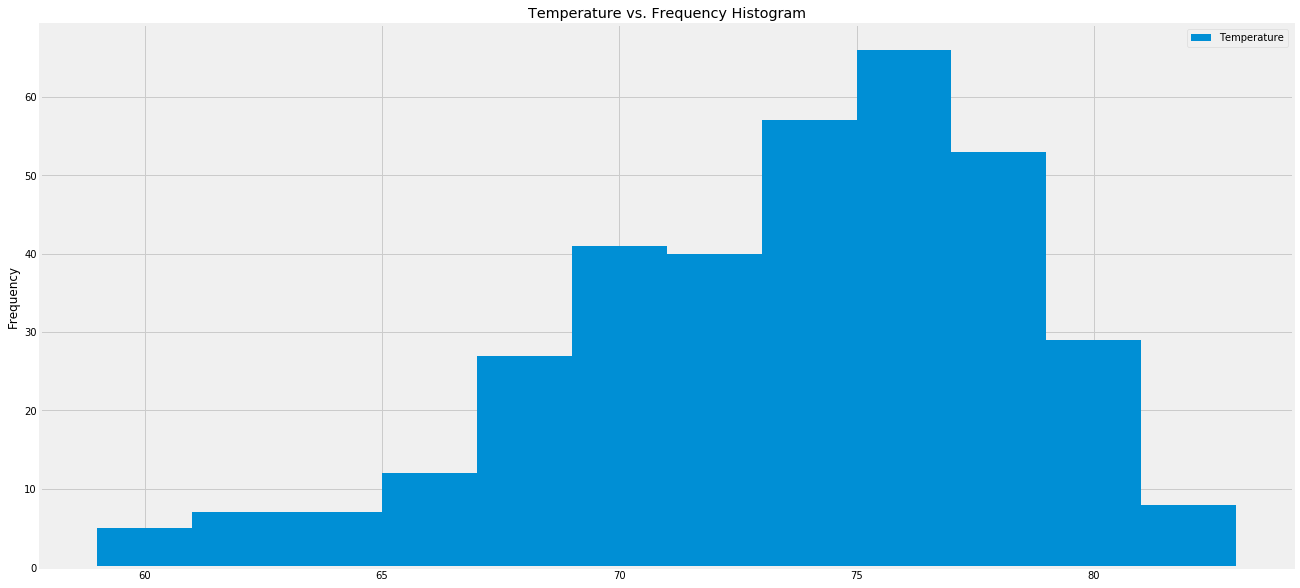

In [80]:
# Plot results to a histogram
temp_obs_df.plot.hist(bins=12, title="Temperature vs. Frequency Histogram", figsize = (20,10))
plt.savefig("Temperature_Observations_Histogram.png")

In [75]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps("2012-02-28", "2012-03-05"))

[(62.0, 69.57142857142857, 74.0)]


In [76]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
temp_trip = calc_temps("2017-08-01","2017-08-10")


In [77]:
temp_df = pd.DataFrame(temp_trip, columns=["Min Temp", "Avg Temp", "Max Temp"])
temp_df

,Min Temp,Avg Temp,Max Temp
0,71.0,79.025641,83.0


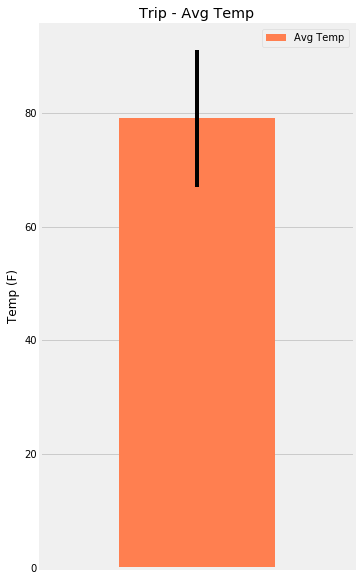

In [78]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
temp_df.plot.bar(y = "Avg Temp", yerr = (temp_df["Max Temp"] - temp_df["Min Temp"]), title = "Trip - Avg Temp", color = "coral", figsize = (5,10))
plt.xticks(np.arange(1, 1.0))
plt.ylabel("Temp (F)")
plt.savefig("Trip_Average_Temperature.png")


In [47]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


def precipitation(start_date, end_date):
    sel = [Measurement.station,
           Station.name, 
           Station.latitude, 
           Station.longitude, 
           Station.elevation,
           func.sum(Measurement.prcp)] 
    
    return session.query(*sel).\
        filter(Measurement.station == Station.station).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
        group_by(Measurement.station).\
        order_by(func.sum(Measurement.prcp).desc()).all()

print(precipitation("2017-08-01","2017-08-10"))

   

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.9199999999999999), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.32), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.06), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.04), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


In [48]:
prec_trip = precipitation("2017-08-01","2017-08-10")
prec_tripdf = pd.DataFrame(prec_trip, columns = ["Station", "Name", "Latitude", "Longitude", "Elevation", "Precipitation"])
prec_tripdf

,Station,Name,Latitude,Longitude,Elevation,Precipitation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.92
1,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.32
2,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.06
3,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.04
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.00


## Optional Challenge Assignment

In [49]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("08-01")

[(67.0, 75.54, 83.0)]

In [50]:
daily_normals

<function __main__.daily_normals(date)>

In [51]:
# Calculate the daily normals for your trip and pusheach tuple of calculations into a list called `normals`
startdate = "08-01"
enddate = "08-10"


normals = session.query(func.strftime("%m-%d", Measurement.date), func.min(Measurement.tobs), func.avg(Measurement.tobs),func.max(Measurement.tobs)).\
filter(func.strftime("%m-%d", Measurement.date) >= startdate).\
filter(func.strftime("%m-%d", Measurement.date) <= enddate).\
group_by(func.strftime("%m-%d", Measurement.date)).all()        

normals                                             
                   

[('08-01', 67.0, 75.54, 83.0),
 ('08-02', 68.0, 75.60377358490567, 84.0),
 ('08-03', 70.0, 76.61111111111111, 85.0),
 ('08-04', 69.0, 76.71153846153847, 84.0),
 ('08-05', 69.0, 76.14814814814815, 82.0),
 ('08-06', 67.0, 76.25, 83.0),
 ('08-07', 71.0, 77.15686274509804, 83.0),
 ('08-08', 68.0, 76.5576923076923, 83.0),
 ('08-09', 69.0, 75.98039215686275, 81.0),
 ('08-10', 65.0, 76.42, 83.0)]

In [52]:
# Convert query results "normals" into a dataframe
normalsdf = pd.DataFrame(normals, columns = ["Short Date", "Min Temp", "Avg Temp", "Max Temp"])
newnormalsdf = normalsdf.drop("Short Date", axis=1)
newnormalsdf

,Min Temp,Avg Temp,Max Temp
0,67.0,75.540000,83.0
1,68.0,75.603774,84.0
2,70.0,76.611111,85.0
3,69.0,76.711538,84.0
4,69.0,76.148148,82.0
5,67.0,76.250000,83.0
6,71.0,77.156863,83.0
7,68.0,76.557692,83.0
8,69.0,75.980392,81.0
9,65.0,76.420000,83.0


In [53]:
# Set the start and end date of the trip
startdate = "2017-08-01"
enddate = "2017-08-10"
# Use the start and end date to create a range of dates
dates = session.query(Measurement.date).filter(Measurement.date >= startdate, Measurement.date <= enddate).group_by(Measurement.date).all()
dates

[('2017-08-01'),
 ('2017-08-02'),
 ('2017-08-03'),
 ('2017-08-04'),
 ('2017-08-05'),
 ('2017-08-06'),
 ('2017-08-07'),
 ('2017-08-08'),
 ('2017-08-09'),
 ('2017-08-10')]

In [54]:
datesdf = pd.DataFrame(dates, columns =["Vacation Date"])
datesdf

,Vacation Date
0,2017-08-01
1,2017-08-02
2,2017-08-03
3,2017-08-04
4,2017-08-05
5,2017-08-06
6,2017-08-07
7,2017-08-08
8,2017-08-09
9,2017-08-10


In [55]:
# Add vacation dates to dataframe
newnormalsdf["Vacation Dates"] = datesdf
newnormalsdf

,Min Temp,Avg Temp,Max Temp,Vacation Dates
0,67.0,75.540000,83.0,2017-08-01
1,68.0,75.603774,84.0,2017-08-02
2,70.0,76.611111,85.0,2017-08-03
3,69.0,76.711538,84.0,2017-08-04
4,69.0,76.148148,82.0,2017-08-05
5,67.0,76.250000,83.0,2017-08-06
6,71.0,77.156863,83.0,2017-08-07
7,68.0,76.557692,83.0,2017-08-08
8,69.0,75.980392,81.0,2017-08-09
9,65.0,76.420000,83.0,2017-08-10


In [56]:
# Reset index to Vacation Dates
dailynewnormalsdf=newnormalsdf.set_index("Vacation Dates")
dailynewnormalsdf

,Min Temp,Avg Temp,Max Temp
Vacation Dates,,,
2017-08-01,67.0,75.540000,83.0
2017-08-02,68.0,75.603774,84.0
2017-08-03,70.0,76.611111,85.0
2017-08-04,69.0,76.711538,84.0
2017-08-05,69.0,76.148148,82.0
2017-08-06,67.0,76.250000,83.0
2017-08-07,71.0,77.156863,83.0
2017-08-08,68.0,76.557692,83.0
2017-08-09,69.0,75.980392,81.0


In [57]:
# Plot the daily normals as an area plot with `stacked=False`
x = dailynewnormalsdf.index.values.tolist()
y1 = dailynewnormalsdf["Min Temp"].values.tolist()
y2 = dailynewnormalsdf["Avg Temp"].values.tolist()
y3 = dailynewnormalsdf["Max Temp"].values.tolist()
mycolors = ['tab:red', 'tab:blue', 'tab:green']      
columns = ["Min Temp","Ave Temp", "Max Temp"]

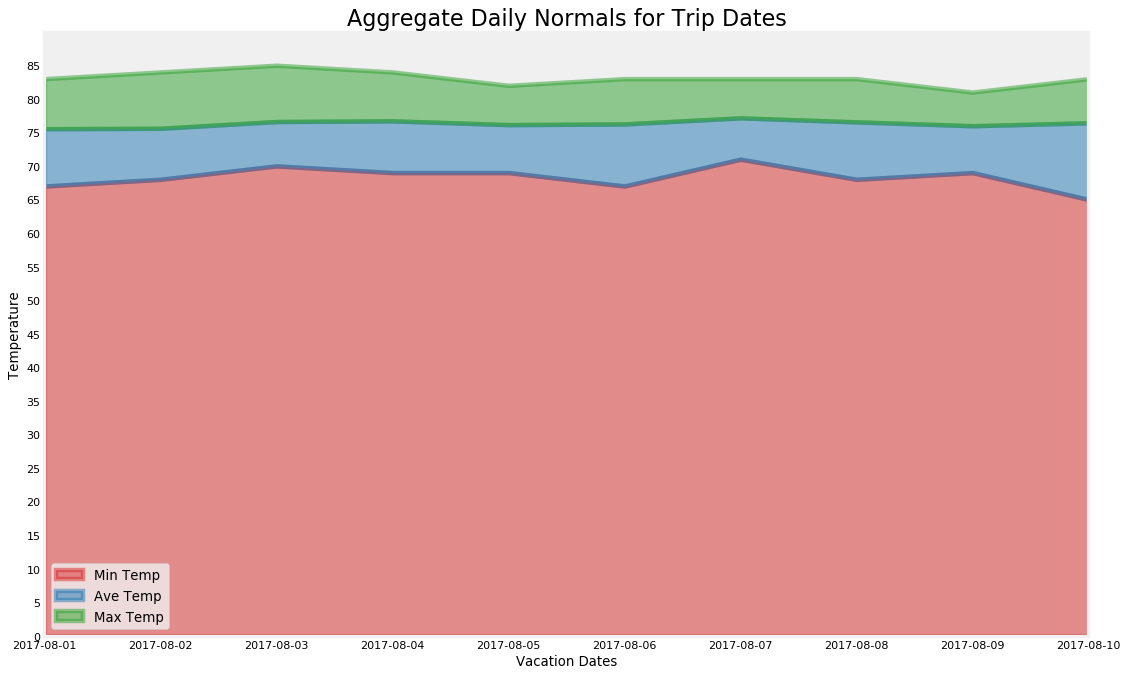

In [79]:

fig, ax = plt.subplots(1, 1, figsize=(15,10), dpi= 80)
ax.fill_between(x, y1=y1, y2=0, label=columns[0], alpha=0.5, color=mycolors[0], linewidth=4)
ax.fill_between(x, y1=y2, y2=y1, label=columns[1], alpha=0.5, color=mycolors[1], linewidth=4)
ax.fill_between(x, y1=y3, y2=y2, label=columns[2],  alpha=0.5, color=mycolors[2], linewidth=4)

ax.set_title("Aggregate Daily Normals for Trip Dates", fontsize=20)
ax.set(ylim=[0, 90])
ax.legend(loc='lower left', fontsize=12)
ax.grid()
plt.xticks(x[::1], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(0, 90.0, 5), fontsize=10)
plt.xlim(x[0], x[-1])
ax.set_xlabel("Vacation Dates")
ax.set_ylabel("Temperature")
plt.savefig("Aggregate_Daily_Normals_for_Trip_Dates.png")
